In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit 

1. Solucionar la ecuación diferencias con m = 0.2kg 7 k = 1 N/m
$ m \frac{dv}{dt} + kx$

In [56]:
def dU_dt(U,t,m=0.2,k=1):
    x,v=U
    return [v,-k*x]

In [199]:
#Valores aleatorios de la velocidad y la posición, condiciones iniciales
tmax = 10
V = 5 #m/s Velocidad maxima 
X = 8 #m distancia del resorte
x_in = np.random.uniform(-X,X,1000)
v_in = np.random.uniform(-V,V,1000)
#Condicionales iniciales
U0 = [x_in[0],v_in[0]]
#Tiempo
t = np.linspace(0,tmax,100)

In [77]:
Us = integrate.odeint(dU_dt,U0,t) #Se utiliza la librería de scipy

(-4.0, 4.0)

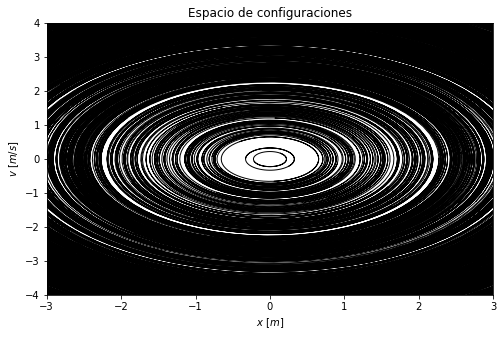

In [200]:
j = 0
#Se crea un ciclo for para graficar cada uno de los casos 
plt.figure(figsize=(8,5))
for x_in1,v_in1 in zip(x_in,v_in):
    t = np.linspace(0,tmax,100)
    U0 = [x_in1,v_in1]
    Us = integrate.odeint(dU_dt,U0,t)
    plt.plot(Us[:,0],Us[:,1],lw =1,color ="black")

plt.title("Espacio de configuraciones")
plt.xlabel("$ x \ [m]$")
plt.ylabel("$v \ [m/s]$")
plt.xlim(-3,3)
plt.ylim(-4,4)


2.  Muestra de Strontium-90

In [84]:
url = "https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json"

In [85]:
df = pd.read_json(url)

In [185]:
#Determinar el valor de el tiempo medio
#Se concstruye función que permite ajustar los datos 
deca1 = lambda t,τ: df["N(t)"][0]*np.exp(-(np.log(2)/τ)*t)
res1, sol2 = curve_fit(deca1,df["t"],df["N(t)"])
σ = np.sqrt(sol2[0])
λ = np.log(2)/res1[0]

In [169]:
print(f"La vida media del es {res1[0]:.4}")
print(f"El error del tiempo medio es de {σ[0]:.2}")
print(f"El valor de la constante de decaimiento es {λ:.2}")

La vida media del es 27.99
El error del tiempo medio es de 0.41
El valor de la constante de decaimiento es 0.025


a) primer punto

In [170]:
print("τ = {:.2f} ± {:.2f}".format(res1[0],σ[0]))

τ = 27.99 ± 0.41


b) Segundo punto

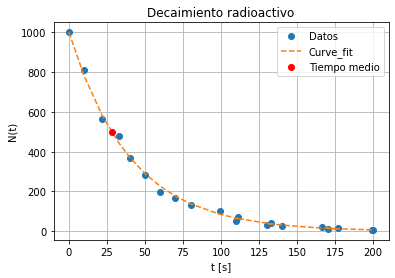

In [198]:
plt.plot(df["t"],df["N(t)"],"o",label = "Datos")
plt.plot(df["t"],deca1(df["t"],res1[0]),"--",label = "Curve_fit")
plt.plot(res1,deca1(res1,res1),"or",label="Tiempo medio")
plt.title("Decaimiento radioactivo")
plt.xlabel("t [s]")
plt.ylabel("N(t)")
plt.legend()
plt.grid()
